# OASIS INFOBYTE DATA SCIENCE INTERNSHIP

# TASK-4 EMAIL SPAM DETECTION WITH MACHINE LEARNING

## VUTUKURI MADHU SUDHANA VAMSI

In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix

In [3]:
spam_df = pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [4]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Steps to follow

1.Data Cleaning
2.EDA
3.Text Preprocessing
4.Model building
5.Evaluation


### 1.Data Cleaning

In [5]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
spam_df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
spam_df.sample(5)


,v1,v2
408,ham,Headin towards busetop
4145,ham,I canåÕt wait for cornwall. Hope tonight isnåÕ...
4684,ham,"Alright we'll bring it to you, see you in like..."
3074,ham,Take us out shopping and Mark will distract Is...
2210,ham,Just wanted to say holy shit you guys weren't ...


In [8]:
# renaming the cols
spam_df.rename(columns={'v1':'target','v2':'text'},inplace=True)
spam_df.sample(5)

,target,text
1321,ham,"I wake up long ago already... Dunno, what othe..."
2376,ham,I'm on my way home. Went to change batt 4 my w...
4760,ham,It's Ì© only $140 ard...Ìä rest all ard $180 a...
4359,ham,"Night sweet, sleep well! I've just been to see..."
2516,ham,Yes.i'm in office da:)


In [9]:
spam_df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
spam_df['target'] = spam_df.target.map({'ham': 0, 'spam': 1})

In [11]:
spam_df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Check the size of dataset
spam_df.shape

(5572, 2)

In [13]:
# missing values
spam_df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check for duplicate values
spam_df.duplicated().sum()

403

In [15]:
# remove duplicates
spam_df = spam_df.drop_duplicates(keep='first')

In [16]:
spam_df.duplicated().sum()


0

In [17]:
spam_df.shape


(5169, 2)

In [18]:
spam_df.describe()


,target
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## 2.Exploratory data analysis 

In [19]:
spam_df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
spam_df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

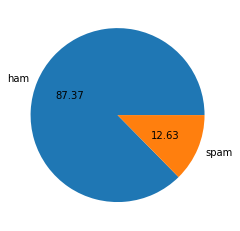

In [21]:
import matplotlib.pyplot as plt
plt.pie(spam_df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
# !pip install nltk
!pip install nltk

In [23]:
# Data is imbalanced
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/subrahmanyamviswanadhvutukuri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
spam_df['num_characters'] = spam_df['text'].apply(len)

/var/folders/nm/6qgmywdd49lcjb8gjw6ss0k40000gn/T/ipykernel_5557/1328026172.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['num_characters'] = spam_df['text'].apply(len)


In [25]:
spam_df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words
spam_df['num_words'] = spam_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

/var/folders/nm/6qgmywdd49lcjb8gjw6ss0k40000gn/T/ipykernel_5557/908958252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['num_words'] = spam_df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [27]:
spam_df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
spam_df['num_sentences'] = spam_df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/var/folders/nm/6qgmywdd49lcjb8gjw6ss0k40000gn/T/ipykernel_5557/276955920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['num_sentences'] = spam_df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [29]:
spam_df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
# Email ham
spam_df[spam_df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# Email spam
spam_df[spam_df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<AxesSubplot:>

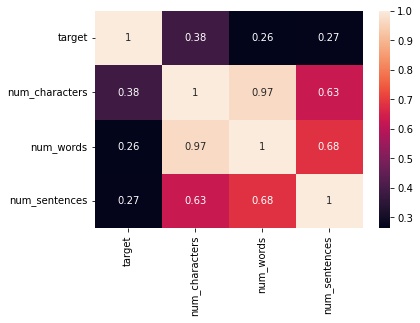

In [32]:
sns.heatmap(spam_df.corr(),annot=True)


## DATA PREPROCESSING

##### Change all words into lower case
##### Tokenization
##### Removing special characters
##### Removing stop words and punctuation
##### Stemming




In [33]:
ps = PorterStemmer()


In [34]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [35]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/subrahmanyamviswanadhvutukuri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
import nltk

In [37]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [38]:
spam_df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [39]:
spam_df['transformed_text'] = spam_df['text'].apply(transform_text)

/var/folders/nm/6qgmywdd49lcjb8gjw6ss0k40000gn/T/ipykernel_5557/2498646644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['transformed_text'] = spam_df['text'].apply(transform_text)


In [40]:
spam_df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [42]:
spam_wc = wc.generate(spam_df[spam_df['target'] == 1]['transformed_text'].str.cat(sep=" "))


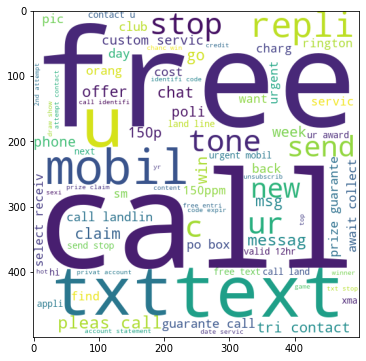

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [44]:
import string

In [45]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [46]:
print(string.punctuation,"\n\n")

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 




In [47]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [48]:
# note :- now 'spam' is equal to 1 

spam_wc=wc.generate(spam_df[spam_df['target']==1]['transformed_text'].str.cat(sep=" "))
spam_wc

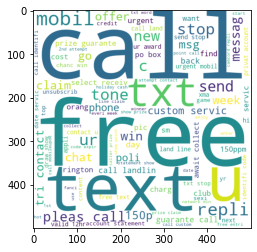

In [49]:
plt.imshow(spam_wc)
plt.show()

## Top 10 most used words in spam 

In [50]:
# for storing most used words
most_used_spam_words=[]

# .tolist() -> to convert 'series' object into 'list'
spam_list=spam_df[spam_df['target']==1]['transformed_text'].tolist()

# accessing each individual elements from spam_list
for sentense in spam_list:
    
    # accessing each individual word form list elements
    for word in sentense.split():
        most_used_spam_words.append(word)

WordCloud on tranformed sms column
1) on spam records

In [51]:
# used for finding most comman words
from collections import Counter

In [52]:
top_10=pd.DataFrame(Counter(most_used_spam_words).most_common(10))

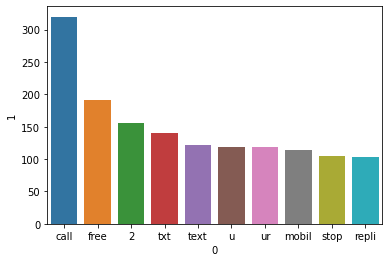

In [53]:
sns.barplot(x=top_10[0],y=top_10[1])
plt.show()

2) on ham records

In [54]:
# note :- now 'spam' is equal to 1 

ham_wc=wc.generate(spam_df[spam_df['target']==0]['transformed_text'].str.cat(sep=" "))
ham_wc

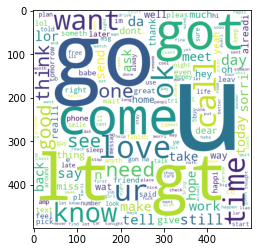

In [55]:
plt.imshow(ham_wc)
plt.show()

Top 10 most used words in spam sms

In [56]:
# for storing most used words
most_used_ham_words=[]

# .tolist() -> to convert 'series' object into 'list'
ham_list=spam_df[spam_df['target']==0]['transformed_text'].tolist()

# accessing each individual elements from spam_list
for sentense in ham_list:
    
    # accessing each individual word form list elements
    for word in sentense.split():
        most_used_ham_words.append(word)

In [57]:
top_10_ham=pd.DataFrame(Counter(most_used_ham_words).most_common(10))

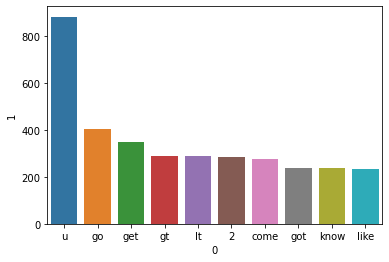

In [58]:
sns.barplot(x=top_10_ham[0],y=top_10_ham[1])
plt.show()

### Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [60]:
X = tfidf.fit_transform(spam_df['transformed_text']).toarray()

In [61]:
X.shape

(5169, 3000)

In [62]:
y = spam_df['target'].values


### Split data into training and testing datasets¶

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

### Training our model using Naive Bayes Model

In [65]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train,y_train)

MultinomialNB()

In [66]:
prediction = naive_bayes.predict(X_test) 

In [67]:
accuracy = accuracy_score(y_test, prediction)
precision = precision_score(y_test,prediction)
recall = recall_score(y_test, prediction)
f1  = f1_score(y_test,prediction)
confusion_mat = confusion_matrix(y_test, prediction)
print('Accuracy:', accuracy)
print('Precision score',precision)
print('Recall score', recall)
print('F1 score', f1)
print('Confusion matrix:', confusion_mat)


Accuracy: 0.9658284977433914
Precision score 1.0
Recall score 0.7451923076923077
F1 score 0.8539944903581267
Confusion matrix: [[1343    0]
 [  53  155]]


In [68]:
# Calculate the time taken to train and test the model
import time
start_time = time.time()
elapsed_time = time.time() - start_time
print('Time taken:', elapsed_time)

Time taken: 2.3126602172851562e-05


In [69]:
# Calculate the error rate
error_rate = 1 - accuracy
print('Error rate:', error_rate)

Error rate: 0.03417150225660859


In [70]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1343
           1       1.00      0.75      0.85       208

    accuracy                           0.97      1551
   macro avg       0.98      0.87      0.92      1551
weighted avg       0.97      0.97      0.96      1551

